In [1]:
from eda_imports import *
from adjustText import adjust_text

In [2]:
df_gb = pd.read_csv('../benchmark_transcriptome/tcga-run-4/benchmark-gradboost.pr_curve.granular.csv')
df_gb['clf_type'] = 'gradboost'

In [3]:
df_cat = df_gb.query('tree_max_depth == 3')

In [21]:
df_k2dt = pd.read_csv('../kleat3_dev/preds_kleat2_whole_transcriptome.csv', sep='\t', header=None,
                 names=['sample_id', 'tree_max_depth', 'precision', 'recall', 'f1'])
df_k2dt['program'] = 'KLEAT2+DT'
df_k2dt.sample_id = df_k2dt.sample_id.replace({
    'UHRR-C1_S1_RNABloom': 'UHRC1',
    'UHRR-C2_S2_RNABloom': 'UHRC2',
    'Brain-C6_S4_RNABloom': 'HBRC6',
    'Brain-C4_S3_RNABloom': 'HBRC4',
})

In [13]:
ndf_k2dt = df_k2dt.query('tree_max_depth == 7')

In [14]:
ndf_k2dt

,sample_id,tree_max_depth,precision,recall,f1,program
20,HBRC4,7,0.847618,0.109956,0.194660,KLEAT2+DT
21,HBRC6,7,0.839193,0.100916,0.180166,KLEAT2+DT
22,UHRC1,7,0.837958,0.089243,0.161307,KLEAT2+DT
23,UHRC2,7,0.832997,0.092322,0.166221,KLEAT2+DT


0,1,2,3,

Text(0.5,1.01,'KARBOR+GradientBoostingClassifier')

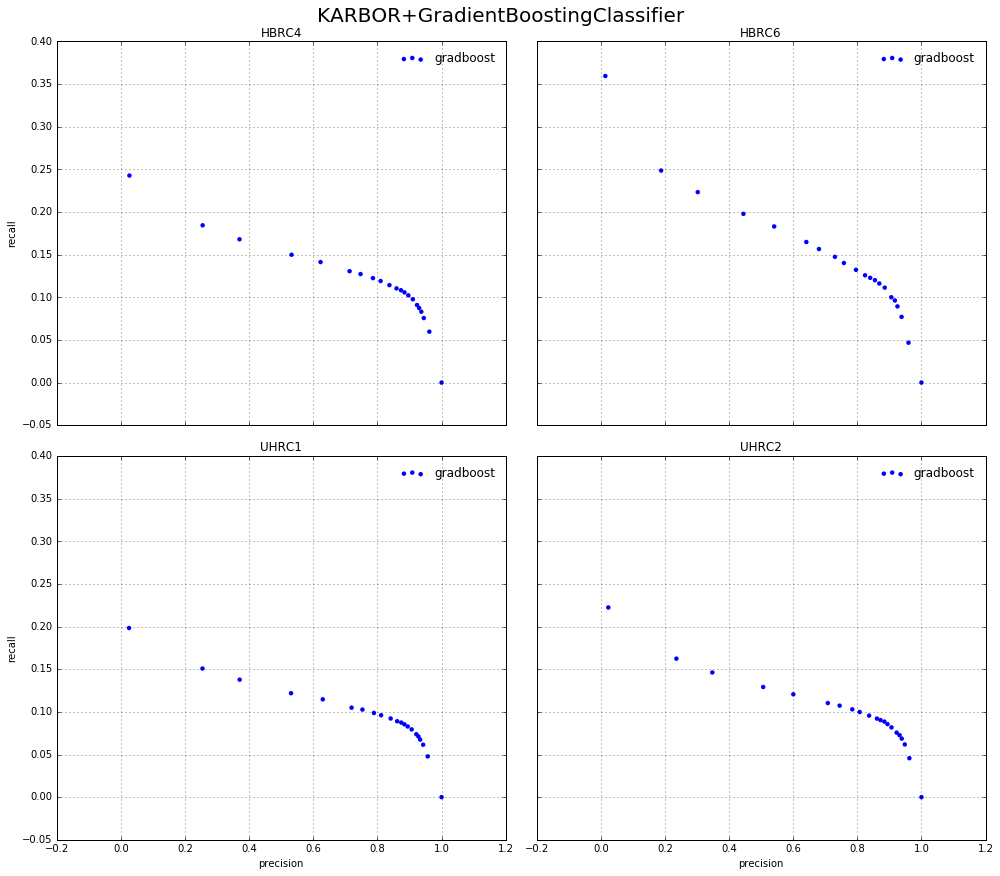

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12), 
                         sharex=True, sharey=True
                        )
axes = axes.ravel()

sids = np.sort(df_gb.sample_id.unique())
for k, sid in enumerate(sids):
    print(k, end=',')
    ax = axes[k]
    
#     for depth in depths:
    _df = df_cat.query('clf_type == "gradboost"').query(f'tree_max_depth == 3').query(f'sample_id == "{sid}"')
    _df.plot.scatter('prec', 'recall', marker='o', alpha=1,
                    edgecolor='none', color='blue', ax=ax, label=f'gradboost')

        
    ax.set_title(sid)
    
    ax.set_xlabel('precision')
    ax.set_ylabel('recall')
    ax.grid()
    
    ax.legend(loc='best', framealpha=0)
    
    ax.set_xlim(-0.2,  1.2)
    ax.set_ylim(-0.05, 0.4)
    
#     adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))
plt.tight_layout()
plt.suptitle('KARBOR+GradientBoostingClassifier', y=1.01, fontsize=20)

# UHRC1 only

Text(0.5,1,'UHRC1 transcriptome')

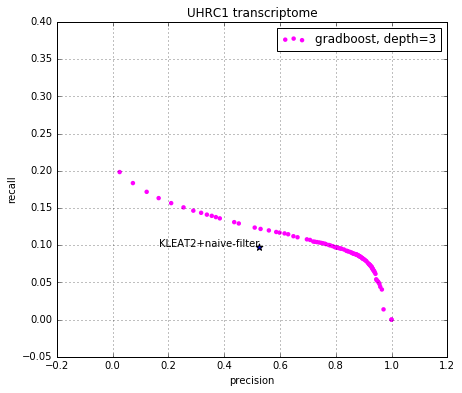

In [5]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)

sids = np.sort(df_cat.sample_id.unique())
# depths = np.sort(df_cat.tree_max_depth.unique())
depths = [3] + np.arange(5, 10).tolist()

color_dd = dict(zip(depths, ['magenta', 'blue', 'red', 'green', 'cyan', 'orange', 'yellow', 'black']))
marker_dd = {
    'gradboost': 'x',
    'dt': 'o'
}

sid = 'UHRC1'


for clf_type in [
    'gradboost', 
#     'dt', 
]:
    for depth in depths:
        _df = df_cat.query(f'tree_max_depth == "{depth}"')\
            .query(f'sample_id == "{sid}"')\
            .query(f'clf_type == "{clf_type}"')
        if _df.shape[0] == 0:
            continue
        color = color_dd.get(depth, 'black')
        _df.plot.scatter(
            'prec', 'recall', marker='o', alpha=1,
            edgecolor='none', color=color, ax=ax, label=f'{clf_type}, depth={depth}')

# k2dt_vals = ndf_k2dt.query(f'sample_id == "{sid}"')[['precision', 'recall']].values[0]
# ax.scatter([k2dt_vals[0]], [k2dt_vals[1]])
# txt = ax.text(k2dt_vals[0], k2dt_vals[1], 'KLEAT2+DT', ha='right')

if sid == "UHRC1":
    k2_nf_prec, k2_nf_recall = [0.5264736297828335, 0.098001848001848]
    ax.scatter([k2_nf_prec], [k2_nf_recall], marker='*', s=50)
    txt = ax.text(k2_nf_prec, k2_nf_recall, 'KLEAT2+naive-filter', ha='right')

#     k2_nf_prec_114genes, k2_nf_recall_114genes = [0.530055, 0.156704]
#     ax.scatter([k2_nf_prec_114genes], [k2_nf_recall_114genes], marker='^')
#     txt = ax.text(k2_nf_prec_114genes, k2_nf_recall_114genes, 'KLEAT2+naive-filter-114genes', ha='right')

#     apatrap_prec, apatrap_recall = [0.0007928734667226342, 0.027463651050080775]
#     ax.scatter([apatrap_prec], [apatrap_recall])
#     txt = ax.text(apatrap_prec, apatrap_recall, 'APATrap-tentative')

#     # slight overestimate based on the graph
#     cm2_default = [0.89, 0.019]
#     ax.scatter([cm2_default[0]], [cm2_default[1]])
#     txt = ax.text(cm2_default[0], cm2_default[1], 'CM2-default-chen', ha='right')

#     cm2_sl1000_rs2 = [0.87, 0.034] 
#     ax.scatter([cm2_sl1000_rs2[0]], [cm2_sl1000_rs2[1]])
#     txt = ax.text(cm2_sl1000_rs2[0], cm2_sl1000_rs2[1], 'CM2-sl1000-rs2-chen', ha='right')

#     k2_chen = [0.745, 0.07]
#     ax.scatter([k2_chen[0]], [k2_chen[1]])
#     txt = ax.text(k2_chen[0], k2_chen[1], 'KLEAT2-max-F01-chen', ha='right')

ax.set_xlabel('precision')
ax.set_ylabel('recall')
ax.grid()

# ax.legend(framealpha=0, bbox_to_anchor=(1.04,1), loc="upper left")
ax.legend(framealpha=1)
ax.set_xlim(-0.2,  1.2)
ax.set_ylim(-0.05, 0.4)
ax.set_title('UHRC1 transcriptome')

# ax.set_title('KARBOR+GradientBoostingClassifier')
# plt.savefig('../benchmark_transcriptome/tcga-run-4/benchmark-UHRC1-transcriptome.png', 
#             bbox_inches='tight', dpi=150)

In [16]:
pwd

'/projects/btl2/zxue/kleat/notebooks'